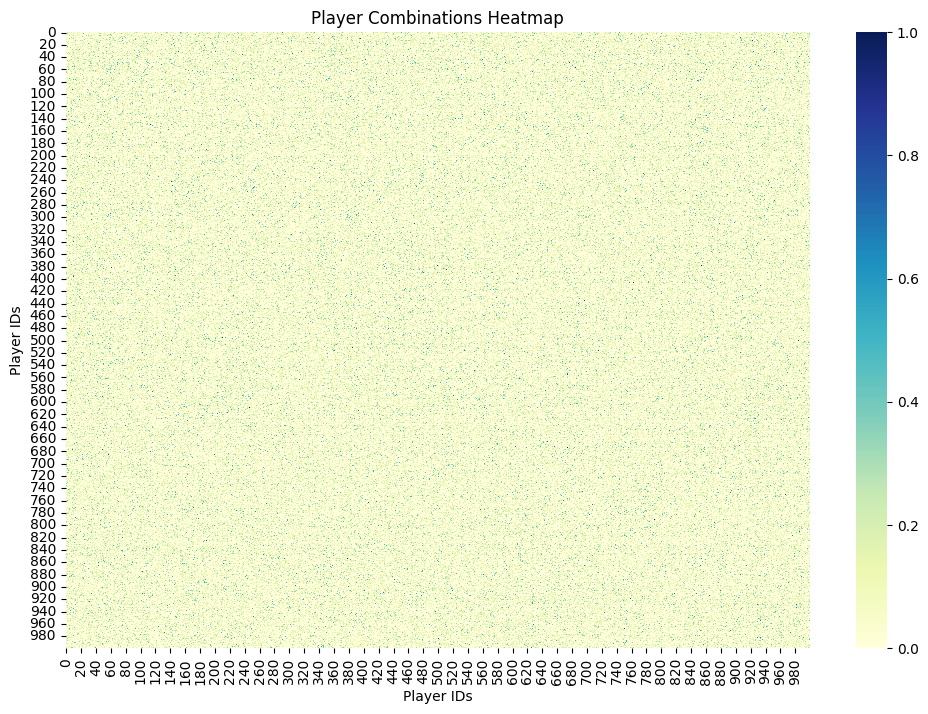

{0: 0.19583333333333333,
 1: 0.19561111111111112,
 2: 0.19944444444444445,
 3: 0.205,
 4: 0.19866666666666669,
 5: 0.19922222222222222,
 6: 0.199,
 7: 0.20377777777777778,
 8: 0.19750000000000004,
 9: 0.20044444444444445,
 10: 0.19066666666666668,
 11: 0.1991666666666667,
 12: 0.2041111111111111,
 13: 0.197,
 14: 0.2045,
 15: 0.1898888888888889,
 16: 0.20261111111111113,
 17: 0.21233333333333335,
 18: 0.19811111111111113,
 19: 0.20161111111111113,
 20: 0.2078888888888889,
 21: 0.208,
 22: 0.2036666666666667,
 23: 0.19655555555555557,
 24: 0.21127777777777776,
 25: 0.20955555555555558,
 26: 0.20583333333333334,
 27: 0.20872222222222223,
 28: 0.20394444444444446,
 29: 0.20005555555555557,
 30: 0.20772222222222222,
 31: 0.19488888888888892,
 32: 0.20527777777777778,
 33: 0.2031111111111111,
 34: 0.19577777777777777,
 35: 0.20333333333333334,
 36: 0.19644444444444445,
 37: 0.20455555555555557,
 38: 0.20033333333333336,
 39: 0.20811111111111114,
 40: 0.21838888888888888,
 41: 0.204777777777

In [2]:
from collections import defaultdict
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

lineup_players = np.random.randint(0, 1000, size=(5000, 9))

unique_players = np.unique(lineup_players)

player_combinations = defaultdict(int)

for lineup in lineup_players:
    player_pairs = list(combinations(lineup, 2))

    for pair in player_pairs:
        sorted_pair = tuple(sorted(pair))
        reverse_sorted_pair = tuple(sorted(pair, reverse=True))
        
        player_combinations[sorted_pair] += 1
        player_combinations[reverse_sorted_pair] += 1

player_combinations

combinations_matrix = np.zeros((1000, 1000)) 
for pair, count in player_combinations.items():
    p1, p2 = pair
    combinations_matrix[p1, p2] = count

normalized_combinations_matrix = combinations_matrix / max(combinations_matrix.flatten())

plt.figure(figsize=(12, 8))
sns.heatmap(normalized_combinations_matrix, cmap="YlGnBu", xticklabels=20, yticklabels=20)
plt.xlabel("Player IDs")
plt.ylabel("Player IDs")
plt.title("Player Combinations Heatmap")
plt.show()

from pprint import pprint

heatmap_dict = dict(zip(unique_players, normalized_combinations_matrix))
square_mean_loss = {player : 0 for player in heatmap_dict.keys()}
for player, heatmap in heatmap_dict.items():
    EXPECTED_VALUE = 0.5
    square_mean_loss[player] = np.mean(np.square(heatmap - EXPECTED_VALUE))

pprint(square_mean_loss)

lineup_losses = []
for lineup in lineup_players:
    lineup_loss = 0
    for player in lineup:
        lineup_loss += square_mean_loss[player]
    lineup_losses.append(lineup_loss)

lineup_players_string = np.array(list(map(lambda x: str(x), lineup_players)))
lineup_losses_dict = dict(zip(lineup_players_string, lineup_losses))
pprint(sorted(list(lineup_losses_dict.items()), key=lambda x: x[1], reverse=True))
